<a href="https://colab.research.google.com/github/Monakairine/Python-playground/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Clustering is the process of segregating the
data points into a number of clusters in which data points in the same clusters are
more related to each other than those in other clusters. The clustering can be hard
or soft, depending on the membership of the data points to the specific cluster. In
hard clustering, the data points are hard-grouped into a cluster. In soft clustering, data
points are assigned to clusters based on the probability of their membership in that
cluster.



Machine learning algorithms can be broadly classified into two categories - **supervised** and **unsupervised** learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning.** The difference between them happens because of presence of target variable**. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.



Ref [1]: https://www.sciencedirect.com/science/article/pii/B9780128197790000034

## K-Means

**K-Means clustering** is the **most popular unsupervised learning algorithm**. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.


### How its work
First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

## Simple example


Ref [2]: https://www.w3schools.com/python/python_ml_k-means.asp

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [37]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
fig = px.scatter(x, y)
fig.show()

In [31]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=6)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)



In [33]:
fig = px.line(x=range(1, 11), y=inertias, title='Elbow Method')
scatter_fig = px.scatter(x=range(1, 11), y=inertias, title='Elbow Method', labels={'x': 'Number of clusters', 'y': 'Inertia'})
fig.add_trace(scatter_fig.data[0])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



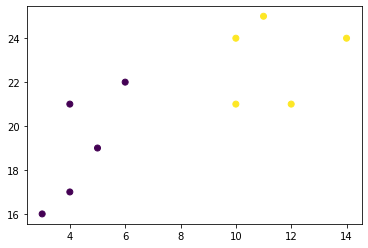

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

## Partitional Clustering
Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are k-means and k-medoids.

These algorithms are both nondeterministic, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:

They work well when clusters have a spherical shape.
They’re scalable with respect to algorithm complexity.
They also have several weaknesses:

They’re not well suited for clusters with complex shapes and different sizes.
They break down when used with clusters of different densities.

Ref[3]: https://realpython.com/k-means-clustering-python/#what-is-clustering

In [41]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [42]:
#Generate the synthetic data and labels:

features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.